# Ahmedabad Housing Trends Exploration

This project explores the housing trends in Ahmedabad. We will perform data analysis on the dataset, conduct feature engineering to extract relevant insights, and build a predictive model to understand and predict housing trends in the city.

**Data Preprocessing:**
- Loading the dataset
- Handling missing values
- Data cleaning and transformation

**Feature Engineering:**
- Creating new features
- Feature selection
- Applying dimensionality reduction

**Data Visualizations:**
- Descriptive statistics
- Understanding the trends using graphs
- Mapping the data on Folium maps

**Predictive Modeling:**
- Building and training machine learning models
- Predicting prices on user input

In [1]:
import pandas as pd
df1 = pd.read_csv('Ahmedabad_rent.csv')
df1.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,2,BHK,Apartment,Bodakdev,"20,000",1450,Furnished,2 bathrooms
1,OWNER,1,RK,Studio Apartment,CG Road,"7,350",210,Semi-Furnished,1 bathrooms
2,OWNER,3,BHK,Apartment,Jodhpur,"22,000",1900,Unfurnished,3 bathrooms
3,OWNER,2,BHK,Independent House,Sanand,"13,000",1285,Semi-Furnished,2 bathrooms
4,OWNER,2,BHK,Independent House,Navrangpura,"18,000",1600,Furnished,2 bathrooms


In [2]:
df1.shape

(18540, 9)

In [3]:
df1.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom'],
      dtype='object')

In [4]:
df1['property_type'].value_counts()

Apartment            16840
Independent House      725
Villa                  647
Studio Apartment       175
Independent Floor      140
Penthouse               13
Name: property_type, dtype: int64

In [5]:
df1['seller_type'].value_counts()

AGENT      17423
OWNER       1112
BUILDER        5
Name: seller_type, dtype: int64

## Dropping unnecessary columns and handling null values

In [6]:
df2 = df1.drop(['seller_type','layout_type'],axis='columns')

In [7]:
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Apartment,Bodakdev,"20,000",1450,Furnished,2 bathrooms
1,1,Studio Apartment,CG Road,"7,350",210,Semi-Furnished,1 bathrooms
2,3,Apartment,Jodhpur,"22,000",1900,Unfurnished,3 bathrooms
3,2,Independent House,Sanand,"13,000",1285,Semi-Furnished,2 bathrooms
4,2,Independent House,Navrangpura,"18,000",1600,Furnished,2 bathrooms


In [8]:
df2.isnull().sum()

bedroom           0
property_type     0
locality          0
price             0
area              0
furnish_type      0
bathroom         76
dtype: int64

In [9]:
df2.dropna(subset=['bathroom'], inplace=True)

## Feature Engineerring

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18464 entries, 0 to 18539
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedroom        18464 non-null  int64 
 1   property_type  18464 non-null  object
 2   locality       18464 non-null  object
 3   price          18464 non-null  object
 4   area           18464 non-null  int64 
 5   furnish_type   18464 non-null  object
 6   bathroom       18464 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [11]:
df2.bathroom = df2.bathroom.apply(lambda x: x.split(' ')[0])
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Apartment,Bodakdev,"20,000",1450,Furnished,2
1,1,Studio Apartment,CG Road,"7,350",210,Semi-Furnished,1
2,3,Apartment,Jodhpur,"22,000",1900,Unfurnished,3
3,2,Independent House,Sanand,"13,000",1285,Semi-Furnished,2
4,2,Independent House,Navrangpura,"18,000",1600,Furnished,2


In [12]:
df2.area = df2.area.astype(float)
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Apartment,Bodakdev,"20,000",1450.0,Furnished,2
1,1,Studio Apartment,CG Road,"7,350",210.0,Semi-Furnished,1
2,3,Apartment,Jodhpur,"22,000",1900.0,Unfurnished,3
3,2,Independent House,Sanand,"13,000",1285.0,Semi-Furnished,2
4,2,Independent House,Navrangpura,"18,000",1600.0,Furnished,2


In [13]:
df2.price = df2.price.apply(lambda x:x.replace(',',''))
df2.price = df2.price.astype(float)
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
0,2,Apartment,Bodakdev,20000.0,1450.0,Furnished,2
1,1,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1
2,3,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3
3,2,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2
4,2,Independent House,Navrangpura,18000.0,1600.0,Furnished,2


In [14]:
# df4 = df3.copy()
df2['price_per_sqft'] = df2['price']/df2['area']
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom,price_per_sqft
0,2,Apartment,Bodakdev,20000.0,1450.0,Furnished,2,13.793103
1,1,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1,35.000000
2,3,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3,11.578947
3,2,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2,10.116732
4,2,Independent House,Navrangpura,18000.0,1600.0,Furnished,2,11.250000


## Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [15]:
df2.locality = df2.locality.apply(lambda x:x.strip())
location_count = df2.locality.value_counts(ascending=False)
location_count

Bopal                                  2935
Gota                                   1781
Near Nirma University On SG Highway    1530
Shela                                  1245
Jodhpur                                 915
                                       ... 
Asarwa                                    1
Bhadaj                                    1
SAL Hospital                              1
Rambaug                                   1
shyamal                                   1
Name: locality, Length: 202, dtype: int64

In [16]:
len(location_count[location_count>5])

93

In [17]:
useless_loc = location_count[location_count<=5]
len(useless_loc)

109

In [18]:
type(useless_loc)

pandas.core.series.Series

In [19]:
df2.locality = df2.locality.apply(lambda x:'other' if x in useless_loc else x)
df2.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom,price_per_sqft
0,2,Apartment,Bodakdev,20000.0,1450.0,Furnished,2,13.793103
1,1,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1,35.000000
2,3,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3,11.578947
3,2,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2,10.116732
4,2,Independent House,Navrangpura,18000.0,1600.0,Furnished,2,11.250000


In [20]:
len(df2.locality.unique())

94

In [21]:
df3 = df2[~(df2.locality=='other')]


In [22]:
len(df3.locality.unique())

93

In [23]:
df3.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom,price_per_sqft
0,2,Apartment,Bodakdev,20000.0,1450.0,Furnished,2,13.793103
1,1,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1,35.000000
2,3,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3,11.578947
3,2,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2,10.116732
4,2,Independent House,Navrangpura,18000.0,1600.0,Furnished,2,11.250000


## Plotting the average prices of various well-known areas inahmedabad

In [24]:
len(location_count[location_count>70])

32

In [25]:
map_df = df2.copy()
useless_loc = location_count[location_count<=70]
map_df.locality = df3.locality.apply(lambda x:'other' if x in useless_loc else x)
map_df.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom,price_per_sqft
0,2,Apartment,Bodakdev,20000.0,1450.0,Furnished,2,13.793103
1,1,Studio Apartment,other,7350.0,210.0,Semi-Furnished,1,35.000000
2,3,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3,11.578947
3,2,Independent House,other,13000.0,1285.0,Semi-Furnished,2,10.116732
4,2,Independent House,Navrangpura,18000.0,1600.0,Furnished,2,11.250000


In [26]:
map_df['locality'].replace({'Jodhpur Village':'Jodhpur'}, inplace=True)
map_df['locality'].replace({'Naranpuraa':'Naranpura'}, inplace=True)
map_df['locality'].replace({'Near Nirma University On SG Highway':'Nirma University'}, inplace=True)
map_df['locality'].replace({'Near Vaishno Devi Circle On SG Highway':'Vaishno Devi'}, inplace=True)
map_df['locality'].replace({'Ambavadi':'Ambawadi'}, inplace=True)

In [27]:
map_df = map_df[~(map_df.locality=='other')]
map_df.locality.unique()

array(['Bodakdev', 'Jodhpur', 'Navrangpura', 'Vejalpur', 'Jivraj Park',
       'Nikol', 'Ghatlodiya', 'Shilaj', nan, 'Vastrapur', 'Satellite',
       'Chandkheda', 'Bopal', 'Prahlad Nagar', 'Vasna', 'Shela',
       'Makarba', 'Memnagar', 'Nirma University', 'Science City',
       'Thaltej', 'Naranpura', 'Jagatpur', 'Motera', 'Ambawadi',
       'Vaishno Devi', 'Paldi', 'Gota', 'Ambli', 'Ranip', 'Sola',
       'Gurukul'], dtype=object)

In [28]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ahmedabad_locality_coordinates")

def get_coordinates(locality):
    try:
        location = geolocator.geocode(f"{locality}, Ahmedabad, Gujarat, India")
        
        if location:
            return [location.latitude, location.longitude]
        else:
            return None
    except Exception as e:
        print(f"Error fetching coordinates for {locality}: {e}")
        return None

In [60]:
import folium

avg_price_by_locality = map_df.groupby('locality')['price'].mean().reset_index()

ahmedabad_map = folium.Map(location=[23.0225, 72.5714], zoom_start=12) 

for index, row in avg_price_by_locality.iterrows():
    locality = row['locality']
    avg_price = row['price']

    avg_price_rounded = round(avg_price / 1000) * 1000
    
    if get_coordinates(locality):
        folium.Marker(
            location = get_coordinates(locality),
            popup=f"Locality: {locality}<br>Avg Price: ₹{avg_price_rounded}",
        ).add_to(ahmedabad_map)
    else:
        print(f"Coordinates not found for {locality}")

ahmedabad_map.save('ahmedabad_house_prices_map.html')
ahmedabad_map

## Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

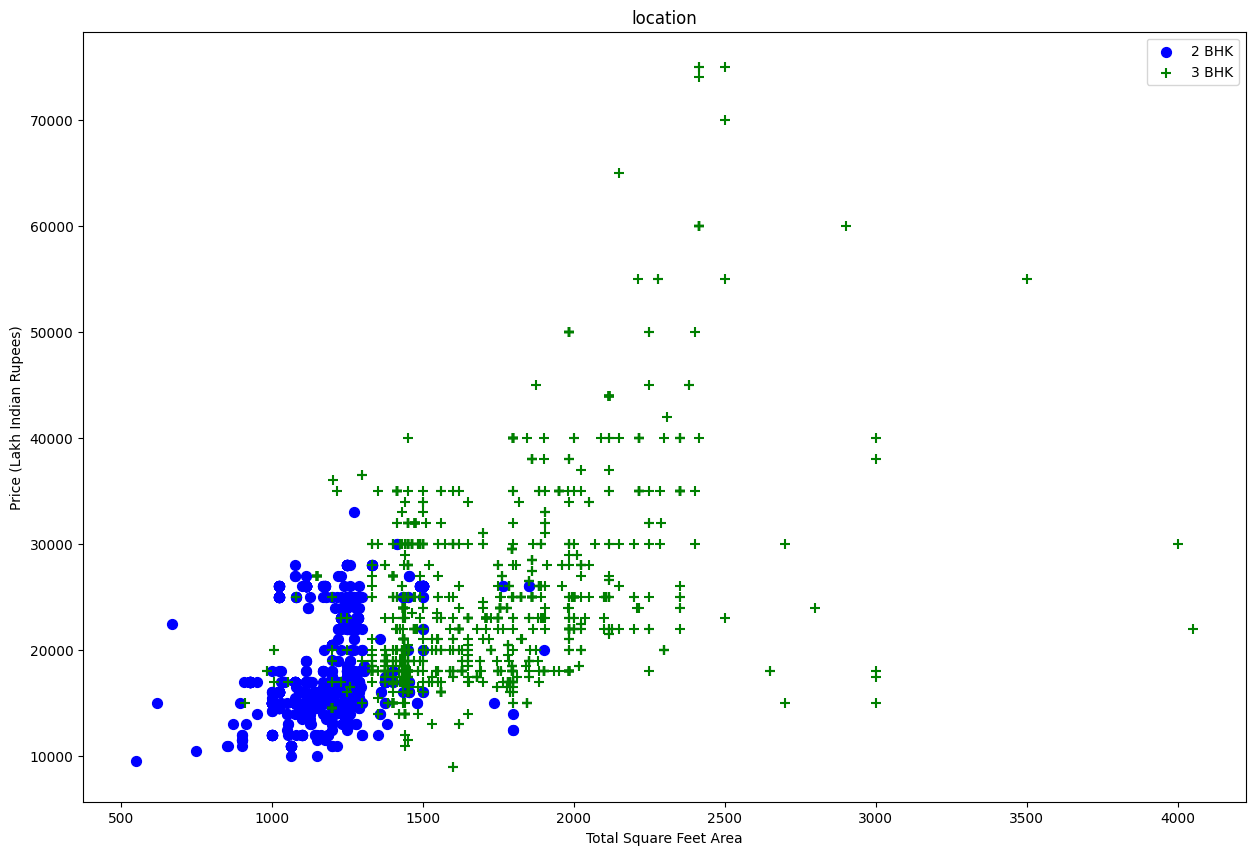

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_scatter_chart(df,location):
    bhk2 = df[(df.locality==location) & (df.bedroom==2)]
    bhk3 = df[(df.locality==location) & (df.bedroom==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title('location')
    plt.legend()
    
plot_scatter_chart(df3,"Bopal")

In [31]:
location_different_bhk_price= df3.copy()

In [32]:
df3.shape

(18278, 8)

## Remove irrelevant values, i.e., for example 2 bhk properties with substantially high price compared to 3 bhk properties

In [33]:
import numpy as np
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('locality'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df4.shape

(8492, 8)

## Unnecessary values Removal Using Bathrooms Feature

In [34]:
df4.bathroom.unique()

array(['1', '2', '3', '4', '5', '6', 'East', '12', '7', 'NorthWest',
       'West', '8', '15'], dtype=object)

Text(0, 0.5, 'count')

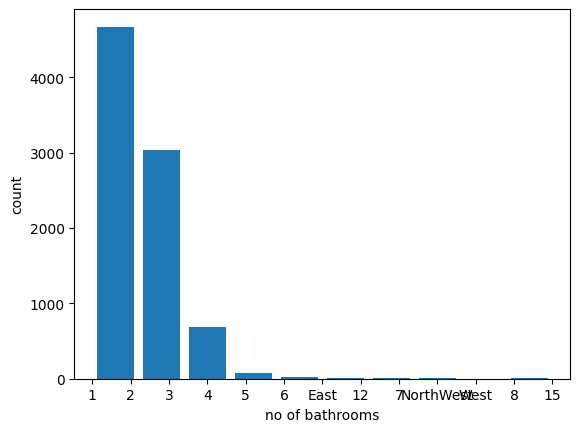

In [35]:
plt.hist(df4.bathroom,rwidth=0.8)
plt.xlabel('no of bathrooms')
plt.ylabel('count')

In [36]:
df4.bathroom.unique()

array(['1', '2', '3', '4', '5', '6', 'East', '12', '7', 'NorthWest',
       'West', '8', '15'], dtype=object)

In [37]:
df4 = df4[~((df4.bathroom=='West') | (df4.bathroom=='East') | (df4.bathroom=='NorthWest'))]
df4.shape

(8484, 8)

In [38]:
df4['bathroom'] = df4['bathroom'].astype(int)

In [39]:
df4[df4.bathroom>6]

,bedroom,property_type,locality,price,area,furnish_type,bathroom,price_per_sqft
5864,10,Apartment,Jivraj Park,1.8,7000.0,Furnished,12,0.000257
6363,5,Apartment,Jodhpur Village,90000.0,4000.0,Semi-Furnished,7,22.500000
8035,7,Villa,Jivraj Park,65000.0,2700.0,Semi-Furnished,7,24.074074
8043,7,Villa,Jivraj Park,65000.0,2700.0,Semi-Furnished,7,24.074074
8044,7,Independent House,Jodhpur,65000.0,2700.0,Semi-Furnished,7,24.074074
17185,8,Villa,Vaishnodevi,55000.0,5908.0,Furnished,8,9.309411
17208,8,Villa,Vaishnodevi,55000.0,5908.0,Furnished,8,9.309411
17265,15,Independent House,Shahibaug,2.1,6500.0,Unfurnished,15,0.000323


In [40]:
df4 = df4.drop('price_per_sqft',axis='columns')
df4.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
1,1,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1
3,2,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2
6,1,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1
7,1,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1
8,2,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2


In [41]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8484 entries, 1 to 18539
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        8484 non-null   int64  
 1   property_type  8484 non-null   object 
 2   locality       8484 non-null   object 
 3   price          8484 non-null   float64
 4   area           8484 non-null   float64
 5   furnish_type   8484 non-null   object 
 6   bathroom       8484 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 497.1+ KB


In [42]:
# df4 = df4.drop('city',axis='columns')
df4.head()

,bedroom,property_type,locality,price,area,furnish_type,bathroom
1,1,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1
3,2,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2
6,1,Apartment,Vejalpur,8500.0,570.0,Unfurnished,1
7,1,Studio Apartment,Jivraj Park,6000.0,180.0,Semi-Furnished,1
8,2,Apartment,Nikol,12000.0,1200.0,Semi-Furnished,2


## Using One Hot encoding for all the categorical data

In [43]:
# dummies1 = pd.get_dummies(df9['property_type'],prefix=None,drop_first=False,dtype=int)
dummies1 = pd.get_dummies(df4['locality'],prefix=None,drop_first=False,dtype=int)
dummies2 = pd.get_dummies(df4['property_type'],prefix=None,drop_first=False,dtype=int)
df5 = pd.concat([df4,dummies1,dummies2],axis='columns')


In [44]:
df5= df5.drop(['furnish_type'],axis='columns')
df5.head()

,bedroom,property_type,locality,price,area,bathroom,Ambavadi,Ambli,Ayojan Nagar,Bapunagar,...,Zundal,Zundal Circle,new c g road chandkheda,shastri Nagar,Apartment,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa
1,1,Studio Apartment,CG Road,7350.0,210.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,Independent House,Sanand,13000.0,1285.0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,Apartment,Vejalpur,8500.0,570.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,1,Studio Apartment,Jivraj Park,6000.0,180.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2,Apartment,Nikol,12000.0,1200.0,2,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
df5= df5.drop(['locality','property_type'],axis='columns')
df5.head()

,bedroom,price,area,bathroom,Ambavadi,Ambli,Ayojan Nagar,Bapunagar,Bhat,Bodakdev,...,Zundal,Zundal Circle,new c g road chandkheda,shastri Nagar,Apartment,Independent Floor,Independent House,Penthouse,Studio Apartment,Villa
1,1,7350.0,210.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,13000.0,1285.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,8500.0,570.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,1,6000.0,180.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,2,12000.0,1200.0,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Building a Model Now...

In [46]:
X=df5.drop('price',axis='columns')
y=df5.price

In [47]:
X.shape

(8484, 102)

In [48]:
y.shape

(8484,)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [50]:
len(x_test)

1697

In [51]:
len(y_test)

1697

In [52]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
lr_model.score(x_test,y_test)

0.7746412373749295

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75465069, 0.78356608, 0.77251886, 0.74236525, 0.81214265])

## Find best model using GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                  'fit_intercept':[True,False],
    'copy_X':[True,False],
    'n_jobs':[None],
    'positive':[True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Krunal Patadia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krunal Patadia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krunal Patadia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Krunal Patadia\AppData\Local\Programs\Python\Python310\lib\site

,model,best_score,best_params
0,linear_regression,0.773263,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,lasso,0.773300,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.847092,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Based on above results we can say that DecisionTreeRegressor gives the best score. Hence we will use that

### Test the model for few properties

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [56]:
dt_model.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.8781913253140718

## The given function reduces the no of arguments of location and property_type to 1

In [57]:
import numpy as np
def predict_price(bedroom,area,bathroom,locality,property_type):    
    loc_index = np.where(X.columns==locality)[0]
    prop_index =  np.where(X.columns==property_type)[0]
#     furn_index = np.where(X.columns==furnished_type)[0]
    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = bathroom
    x[2] = area
    if loc_index >= 0:
        x[loc_index] = 1
    if prop_index>=0:
        x[prop_index] = 1
#     if furn_index>=0:
#         x[furn_index] = 1
    return lr_model.predict([x])[0]

In [58]:
predict_price(4,600,4,'Paldi','Apartment')

C:\Users\Krunal Patadia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


21069.18359375

## Export the tested model to a pickle file

In [59]:
import pickle
with open('Ahmedabad_home_rent_price_model.pickle','wb') as f:
    pickle.dump(lr_model,f)